### General data Description

We are owing a supermarket mall and through membership cards, we have some basic data about our customers like Customer ID, age, gender, annual income and spending score. Spending Score is something we assign to the customer based on our defined parameters like customer behavior and purchasing data. 

### Objective

<ul>
<li>To classify these customers into groups using k-means clustering algorithm which would in turn facilitate to study their spending patterns to maximize our profits. </li>
</ul>

Source of the dataset<br>
https://www.kaggle.com/datasets/kandij/mall-customers/code?datasetId=177976

### Importing Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mall-customers/Mall_Customers.csv


### Loading the Dataset

In [2]:
data = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")

In [3]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Preliminary Analysis 

In [4]:
data.shape

(200, 5)

Inference: <br>
<ol>
    <li>There are 200 rows and 5 columns in the dataset</li>
</ol>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Inference: <br>
<ol>
    <li>There are no null values in the dataset</li>
    <li>All the datatypes of the variables are correct</li>
</ol>

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Inference <br>
<ul>
<li>The ranges of the variables is more or less the same but would be better to scale them</li>
</ul>

### EDA and Feature Engineering

**Selecting the right variables**:

We select the variables Annual income and Spending score because in the current scenario, people of many ages have a different kinds of spending scores. Moreover, Annual Income is a direct indicator of the economic status of an individual

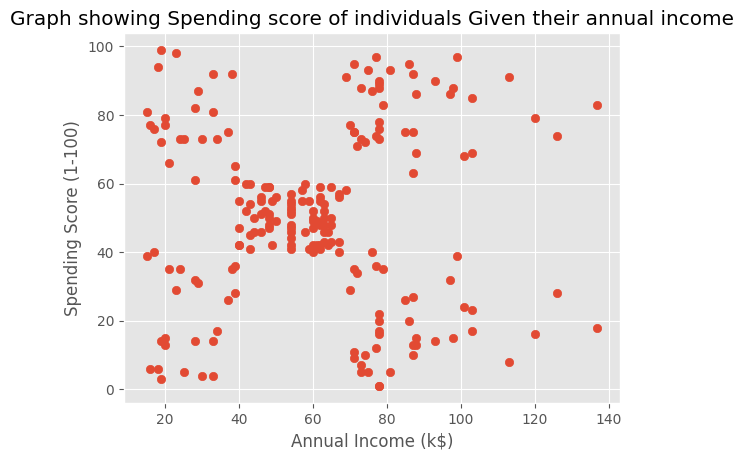

In [7]:
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Graph showing Spending score of individuals Given their annual income")
plt.show()

#### Scaling the Data

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(data[["Annual Income (k$)"]])

data["Annual_income"] = scaler.transform(data[["Annual Income (k$)"]])

In [11]:
scaler.fit(data[["Spending Score (1-100)"]])

data["Spending_score"] = scaler.transform(data[["Spending Score (1-100)"]])

In [12]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_income,Spending_score
0,1,Male,19,15,39,0.000000,0.387755
1,2,Male,21,15,81,0.000000,0.816327
2,3,Female,20,16,6,0.008197,0.051020
3,4,Female,23,16,77,0.008197,0.775510
4,5,Female,31,17,40,0.016393,0.397959


Inference: <br>
The dataset has been scaled

In [13]:
new_data = data[["Annual_income", "Spending_score"]]
new_data.head()

,Annual_income,Spending_score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


Inference: <br>
The final dataset has been prepared 

### Obtaining the number of clusters using the elbow method

In [14]:
k_range = list(range(1, 11))
sse = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data[["Annual_income", "Spending_score"]])
    sse.append(km.inertia_)

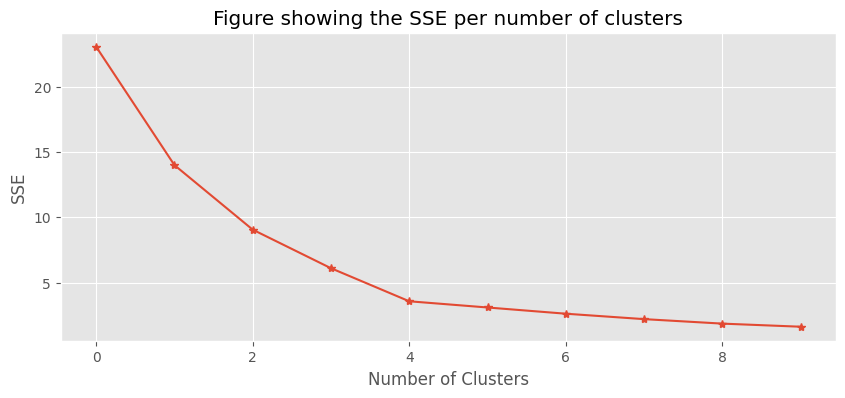

In [15]:
plt.figure(figsize = (10, 4))
plt.plot(sse, marker = "*")
plt.title("Figure showing the SSE per number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Inference: <br>
    <ul>
    <li>Therefore, according to the elbow method, we can choose our number of clusters to be 5 as the decrease in SSE from cluster 4 (when counted from 0) is minimal.</li>
    <li>Therefore, the number of clusters to be taken = 5</li>
    </ul>

### Model Building 

In [16]:
km = KMeans(n_clusters = 5)

In [17]:
y_predicted = km.fit_predict(new_data[["Annual_income", "Spending_score"]])

In [18]:
y_predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [19]:
new_data["cluster"] = (y_predicted + 1)

In [20]:
new_data.head()

,Annual_income,Spending_score,cluster
0,0.000000,0.387755,5
1,0.000000,0.816327,4
2,0.008197,0.051020,5
3,0.008197,0.775510,4
4,0.016393,0.397959,5


In [21]:
new_data.cluster.unique()

array([5, 4, 1, 2, 3], dtype=int32)

In [22]:
print("The coordinates of cluster centroids: ")
km.cluster_centers_

The coordinates of cluster centroids: 


array([[0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

In [23]:
df1 = new_data[new_data.cluster == 1]
df2 = new_data[new_data.cluster == 2]
df3 = new_data[new_data.cluster == 3]
df4 = new_data[new_data.cluster == 4]
df5 = new_data[new_data.cluster == 5]

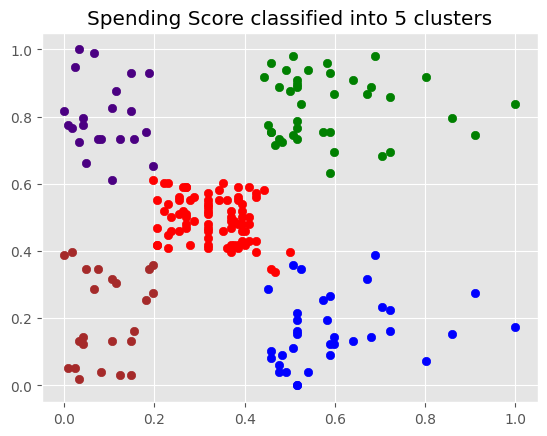

In [24]:
plt.scatter(df1["Annual_income"], df1["Spending_score"], color = "red")
plt.scatter(df2["Annual_income"], df2["Spending_score"], color = "green")
plt.scatter(df3["Annual_income"], df3["Spending_score"], color = "blue")
plt.scatter(df4["Annual_income"], df4["Spending_score"], color = "indigo")
plt.scatter(df5["Annual_income"], df5["Spending_score"], color = "brown")
plt.title("Spending Score classified into 5 clusters")
plt.show()

### Conclusion

We have successfully classified the customers into 5 differenet groups using k-means algorithm. We can now further analyze each individual groups seperatelyt to study their spending patterns and maximize profit accordingly.  